In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/barkvn50/BarkVN-50/BarkVN-50_mendeley/Wrightia/IMG_3762.JPG
/kaggle/input/barkvn50/BarkVN-50/BarkVN-50_mendeley/Wrightia/IMG_3717.JPG
/kaggle/input/barkvn50/BarkVN-50/BarkVN-50_mendeley/Wrightia/IMG_3779.JPG
/kaggle/input/barkvn50/BarkVN-50/BarkVN-50_mendeley/Wrightia/IMG_3775.JPG
/kaggle/input/barkvn50/BarkVN-50/BarkVN-50_mendeley/Wrightia/IMG_3690.JPG
/kaggle/input/barkvn50/BarkVN-50/BarkVN-50_mendeley/Wrightia/IMG_3697.JPG
/kaggle/input/barkvn50/BarkVN-50/BarkVN-50_mendeley/Wrightia/IMG_3743.JPG
/kaggle/input/barkvn50/BarkVN-50/BarkVN-50_mendeley/Wrightia/IMG_3756.JPG
/kaggle/input/barkvn50/BarkVN-50/BarkVN-50_mendeley/Wrightia/IMG_3700.JPG
/kaggle/input/barkvn50/BarkVN-50/BarkVN-50_mendeley/Wrightia/IMG_3774.JPG
/kaggle/input/barkvn50/BarkVN-50/BarkVN-50_mendeley/Wrightia/IMG_3703.JPG
/kaggle/input/barkvn50/BarkVN-50/BarkVN-50_mendeley/Wrightia/IMG_3767.JPG
/kaggle/input/barkvn50/BarkVN-50/BarkVN-50_mendeley/Wrightia/IMG_3725.JPG
/kaggle/input/barkvn50/BarkVN-50/BarkV

# Import the Libraries

In [2]:
import os
import cv2
from glob import glob
import pandas as pd
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from PIL import Image
import plotly.express as px
from sklearn.model_selection import train_test_split
from tqdm import tqdm # it is used for creating progress meters or progress bars
%matplotlib inline

# Exploring the Dataset

In [3]:
image_path = f"../input/barkvn50/BarkVN-50/BarkVN-50_mendeley" # save the image path to a variable

In [4]:
categories = glob(image_path+'/*') # categories store all the list of subdirectories from the image_path using glob library

In [5]:
#Used to get the list of image url and its category it belongs to in a dataframe
filedf = pd.DataFrame()
for cat in categories:
    files = glob(cat+'/*')
    tempdf = pd.DataFrame({'filename' : files, 'category' : cat.split("/")[-1]})
    filedf = pd.concat([tempdf,filedf])

In [6]:
filedf.head()

,filename,category
0,../input/barkvn50/BarkVN-50/BarkVN-50_mendeley...,Citrus aurantiifolia
1,../input/barkvn50/BarkVN-50/BarkVN-50_mendeley...,Citrus aurantiifolia
2,../input/barkvn50/BarkVN-50/BarkVN-50_mendeley...,Citrus aurantiifolia
3,../input/barkvn50/BarkVN-50/BarkVN-50_mendeley...,Citrus aurantiifolia
4,../input/barkvn50/BarkVN-50/BarkVN-50_mendeley...,Citrus aurantiifolia


In [7]:
#to find the number of images in each category
# group the column by the categories and aggregate with respect to  count
# Rename the column and sort the vlaues 
grp_count = filedf.groupby('category').aggregate('count').rename(columns = {'filename' : 'count_num'}).reset_index().sort_values(by="count_num",ascending=False)

In [36]:
grp_count

,category,count_num
3,Anacardium occidentale,239
9,Carica papaya,207
18,Dipterocarpus alatus,158
47,Veitchia merrilli,152
21,Ficus microcarpa,150
2,Adenium species,144
6,Artocarpus heterophyllus,138
33,Musa,132
20,Eucalyptus,127
39,Psidium guajava,122


In [9]:
#plot a bar plot along with their categories and count
px.bar(grp_count,x='category',y='count_num',color='category',title='Counts from each category')

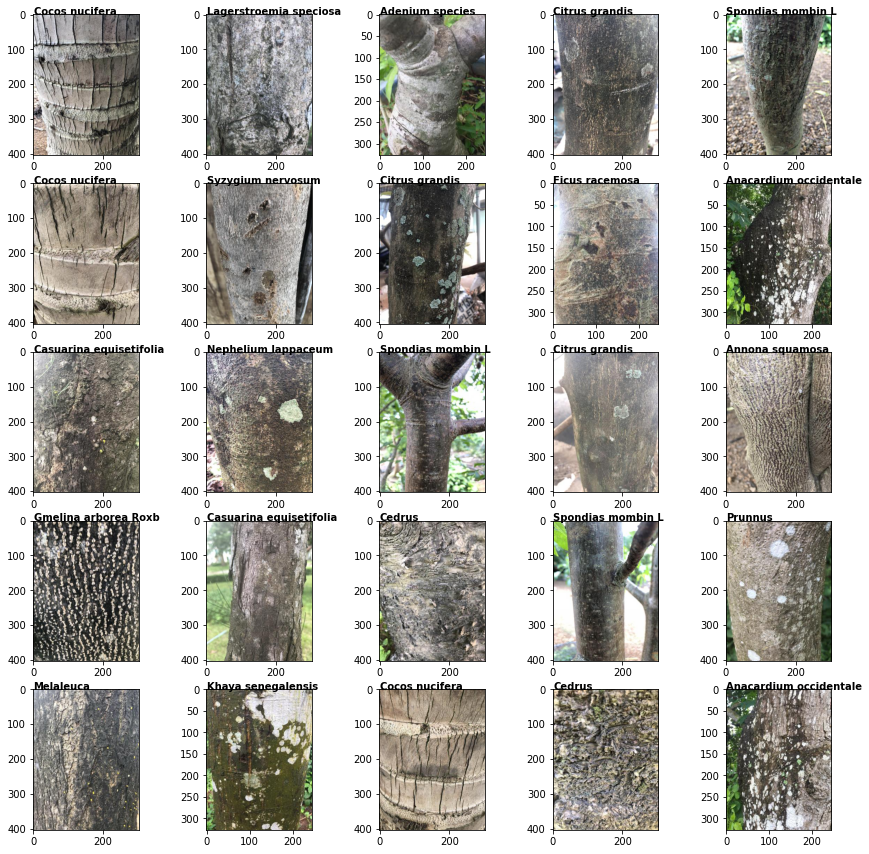

In [10]:
#Randomly plotting different images along with their categories
plt.figure(figsize=(15,15))

for i in range(25):
    path = filedf.filename.sample(1).values[0]
    category = path.split("/")[-2]
    img = Image.open(path)
    ax = plt.subplot(5,5,i+1)
    ax.annotate(category,xy=(0.90,0.90),weight='bold',size=10)
    plt.imshow(img)


**Creating required directory structure**

* Before creating our models, we need to create a required directory structure. Right now we have BarkVN-50-mendeley directory which contains all the sub directories of images.
* At first i created 3 subdirectories train,validation and test i.e by dividing the dataset into two trainandtest split (test size =0.5) which result in underfitting the model due to low amount of data.
* Here i created two directories train and test to store images directories.

In [11]:
#Divide dataset into train and test
X_train,X_test,_,_ = train_test_split(filedf,
                                      filedf.category,
                                      stratify=filedf.category,
                                      test_size= 0.2)

# X_test,X_val,_,_ = train_test_split(X_test,
#                                     X_test.category,
#                                     stratify=X_test.category,
#                                    test_size = 0.5)

In [12]:
# Creating column with the type of data i.e train or test
X_train['type'] = 'train'
X_test['type'] = 'test'
# X_val['type'] = 'val'

In [13]:
#Concatinating both train and test into single dataframe
# fulldf = pd.concat([X_train,X_test,X_val])
fulldf = pd.concat([X_train,X_test])

In [14]:
fulldf.category.value_counts()[0]/len(fulldf)

0.042846898529939045

In [15]:
#Create 3 directories
!mkdir data/
!mkdir data/train
!mkdir data/test
# !mkdir data/val

In [16]:
fulldf.category.unique()

array(['Ficus microcarpa', 'Barringtonia acutangula',
       'Chrysophyllum cainino', 'Persea', 'Cananga odorata',
       'Khaya senegalensis', 'Anacardium occidentale',
       'Syzygium nervosum', 'Delonix regia', 'Prunus salicina',
       'Ficus racemosa', 'Adenanthera microsperma',
       'Gmelina arborea Roxb', 'Nephelium lappaceum', 'Acacia',
       'Veitchia merrilli', 'Lagerstroemia speciosa', 'Adenium species',
       'Wrightia', 'Annona squamosa', 'Mangifera',
       'Casuarina equisetifolia', 'Wrightia religiosa',
       'Spondias mombin L', 'Psidium guajava', 'Erythrina fusca',
       'Melia azedarach', 'Dalbergia oliveri', 'Tamarindus indica',
       'Artocarpus altilis', 'Senna siamea', 'Carica papaya', 'Melaleuca',
       'Artocarpus heterophyllus', 'Dipterocarpus alatus',
       'Citrus aurantiifolia', 'Prunnus', 'Eucalyptus', 'Cocos nucifera',
       'Musa', 'Khaya senegalensis A.Juss', 'Terminalia catappa',
       'Pterocarpus macrocarpus', 'Hopea', 'Tectona grandis',


In [17]:
fulldf

,filename,category,type
78,../input/barkvn50/BarkVN-50/BarkVN-50_mendeley...,Ficus microcarpa,train
62,../input/barkvn50/BarkVN-50/BarkVN-50_mendeley...,Barringtonia acutangula,train
59,../input/barkvn50/BarkVN-50/BarkVN-50_mendeley...,Chrysophyllum cainino,train
52,../input/barkvn50/BarkVN-50/BarkVN-50_mendeley...,Chrysophyllum cainino,train
12,../input/barkvn50/BarkVN-50/BarkVN-50_mendeley...,Persea,train
...,...,...,...
47,../input/barkvn50/BarkVN-50/BarkVN-50_mendeley...,Annona squamosa,test
56,../input/barkvn50/BarkVN-50/BarkVN-50_mendeley...,Hopea,test
47,../input/barkvn50/BarkVN-50/BarkVN-50_mendeley...,Syzygium nervosum,test
94,../input/barkvn50/BarkVN-50/BarkVN-50_mendeley...,Prunus salicina,test


In [18]:
#Creating subdirectories into train and test
for cat in fulldf.category.unique():
    os.system(f"mkdir data/train/'{cat}'")
    os.system(f"mkdir data/test/'{cat}'")
    #os.system(f"mkdir data/val/'{cat}'")

In [19]:
# Used to store data in the required folder structure
for i,rows in fulldf.iterrows():
    cat = rows['category']
    ipath = rows['filename']
    section = rows['type']
    opath = ipath.replace(f"../input/barkvn50/BarkVN-50/BarkVN-50_mendeley/",f"data/{section}/")
    os.system(f"cp '{ipath}' '{opath}'")

In [43]:
import tensorflow as tf
import keras
from sklearn.metrics import confusion_matrix,classification_report
import itertools
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau,EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import SGD,Adam
from keras import Model,layers,Input
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Input,Conv2D,GlobalAveragePooling2D,GlobalMaxPool2D,MaxPool2D,BatchNormalization

In [21]:
train_folder = "./data/train/"
# validation_folder = "./data/val/"
test_folder = "./data/test/"

# Data Augmentation

It is used to increase the amount of data by generating new data points from existing data.
Augmented image will only be used after each epochs, so there wont be conflit with similar images.

In [26]:
train_datagen = ImageDataGenerator(rescale = 1.0/255.,
                               horizontal_flip=True,
                               rotation_range = 45,
                               zoom_range=0.2,
                               height_shift_range = 0.5,
                               width_shift_range = 0.5)

train_generator = train_datagen.flow_from_directory(train_folder,
                                                    batch_size=64,
                                                    shuffle=True,
                                                    class_mode='categorical',
                                                    target_size=(224,224))

# validation_datagen = ImageDataGenerator(rescale = 1.0/255.)

# validation_generator = validation_datagen.flow_from_directory(validation_folder,
#                                                     batch_size=32,
#                                                     shuffle=True,
#                                                     class_mode='categorical',
#                                                     target_size=(224, 224))

test_datagen = ImageDataGenerator(rescale = 1.0/255.)

test_generator = test_datagen.flow_from_directory(test_folder,
                                                    batch_size=64,
                                                    shuffle=True,
                                                    class_mode='categorical',
                                                    target_size=(224, 224))

Found 4462 images belonging to 50 classes.
Found 1116 images belonging to 50 classes.


In [23]:
#The below function is used to plot the loss and accuracy functions
def plot_graph(history):
    plt.plot(history.history['loss'], label='train loss')
    plt.plot(history.history['val_loss'], label='val loss')
    plt.legend()
    plt.title('Loss Graph')
    plt.show()

    # plot the accuracy curve
    plt.plot(history.history['accuracy'], label='train acc')
    plt.plot(history.history['val_accuracy'], label='val acc')
    plt.legend()
    plt.title('Accuracy Graph')
    plt.show()

In [41]:
#This function is used to display the classification report , confusion metrics and Modal Accuracy
def conf_matrix(true_value,model_pred):
    
    classes = test_generator.class_indices.keys()
    TP_count = [true_value[i] == model_pred[i] for i in range(len(true_value))]
    model_accuracy = np.sum(TP_count)/len(TP_count)
    print('Modal Accuracy', model_accuracy)
    
    plt.figure(figsize=(50,50))
    cm = confusion_matrix(true_value,model_pred)
    plt.imshow(cm,cmap=plt.cm.viridis,interpolation='nearest')
    plt.title('Confusion_matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max()*0.8
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                horizontalalignment="center",
                color="black" if cm[i,j] > thresh else "white")
        pass
    
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    pass

    print(classification_report(true_value, model_pred, target_names = list(classes)))

# **VGG19 Model**

In [51]:
# Callbacks are created earlystopping is used 
Lrr = ReduceLROnPlateau(monitor='val_acc',factor=0.1,patience=3,min_lr=1e-5)
vgg19_callbacks = EarlyStopping(monitor="loss",patience=5,verbose=1,mode='auto')
vgg19_best_model_file = './vgg19_drop_best_weights.h5'
vgg19_best_model = ModelCheckpoint(vgg19_best_model_file,monitor='val_acc',save_best_only=True,verbose=1)

#VGG19 model is created with given shapes and include top is set false because we need to add few more layers
VGG19_model = VGG19(weights='imagenet', pooling='avg',
                           include_top=False,
                           input_shape=(224,224,3),
                           classes=50)

#layers trainable are set false
for layer in VGG19_model.layers:
    layer.trainable = False

last_output = VGG19_model.layers[-1].output
vgg_x = Flatten()(last_output)
vgg_x = Dense(512, activation = 'relu')(vgg_x)  #First Dense layer with 512 neuron and relu activation function
vgg_x = Dropout(0.4)(vgg_x)                     #Dropout layer add with 40%
vgg_x = Dense(512, activation = 'relu')(vgg_x)  #Second Dense layer with 512 neuron and relu activation function
vgg_x = Dense(256, activation = 'relu')(vgg_x)  #Third Dense layer with 256 neuron and relu activation function
vgg_x = Dropout(0.3)(vgg_x)                     #Dropout layer add with 30%
vgg_x = Dense(50, activation = 'softmax')(vgg_x) #Fourth Dense layer with 50 neuron and softmax activation function
model = Model(VGG19_model.input, vgg_x)


model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [52]:
# parameters are added
batch_size = 100
epochs = 50
learn_rate = 0.001
adam = Adam(learning_rate=learn_rate)
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])

In [53]:
#fit generator is used when data augmentation is used
vgg_history = model.fit_generator(train_generator,epochs=epochs,validation_data=test_generator,callbacks=[vgg19_best_model,vgg19_callbacks],verbose=1)

Epoch 1/50
131/131 [==============================] - 71s 533ms/step - loss: 3.7646 - accuracy: 0.0722 - val_loss: 3.1355 - val_accuracy: 0.1778
Epoch 2/50
131/131 [==============================] - 70s 537ms/step - loss: 2.8144 - accuracy: 0.2266 - val_loss: 2.1642 - val_accuracy: 0.3477
Epoch 3/50
131/131 [==============================] - 70s 534ms/step - loss: 2.2537 - accuracy: 0.3454 - val_loss: 1.6081 - val_accuracy: 0.5183
Epoch 4/50
131/131 [==============================] - 70s 531ms/step - loss: 2.0054 - accuracy: 0.4150 - val_loss: 1.2803 - val_accuracy: 0.6100
Epoch 5/50
131/131 [==============================] - 70s 537ms/step - loss: 1.8499 - accuracy: 0.4494 - val_loss: 1.1343 - val_accuracy: 0.6502
Epoch 6/50
131/131 [==============================] - 71s 541ms/step - loss: 1.7108 - accuracy: 0.5020 - val_loss: 1.0944 - val_accuracy: 0.6667
Epoch 7/50
131/131 [==============================] - 69s 527ms/step - loss: 1.6319 - accuracy: 0.5178 - val_loss: 0.9822 - val_ac

**Loss and Accuracy Curve of VGG19**

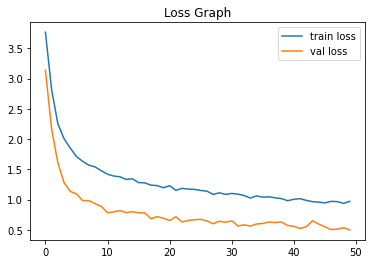

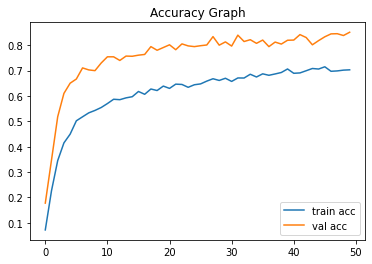

In [55]:
plot_graph(vgg_history)

# ResNet101V2

In [30]:
callbacks = EarlyStopping(monitor="val_loss",patience=5,verbose=1,mode='auto')
best_model_file = './resnet_drop_best_weights.h5'
best_model = ModelCheckpoint(best_model_file,monitor='val_acc',save_best_only=True,verbose=1)

res_base = tf.keras.applications.resnet_v2.ResNet101V2(weights='imagenet',include_top=False,input_shape=(224,224,3),input_tensor=None)
res_base.trainable = False

output = res_base.get_layer(index=-1).output
output = Flatten()(output)
output = Dense(1024, activation='relu')(output) #First Dense layer with 1024 neuron and relu activation function
output = BatchNormalization()(output)   #Normalization added
output = Dropout(0.3)(output)  #Dropout layer add with 30%
output = Dense(512, activation='relu')(output) #Second Dense layer with 512 neuron and relu activation function
output = BatchNormalization()(output) 
output = Dropout(0.3)(output)  #Dropout layer add with 30%
output = Dense(256,activation='relu')(output) #Third Dense layer with 256 neuron and relu activation function
output = BatchNormalization()(output)
output = Dropout(0.3)(output)   #Dropout layer add with 30%
output = Dense(50, activation='softmax')(output) #Fourth Dense layer with 50 neuron and softmax activation function
print("New layers are added")

resnet_model = Model(res_base.input,output)


New layers are added


In [31]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics = ['accuracy'])
history = resnet_model.fit_generator(train_generator,epochs=50,validation_data=test_generator,callbacks=[callbacks,best_model])

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



Epoch 1/50
70/70 [==============================] - 84s 1s/step - loss: 3.5431 - accuracy: 0.1829 - val_loss: 3.2398 - val_accuracy: 0.2957
Epoch 2/50
70/70 [==============================] - 74s 1s/step - loss: 2.4594 - accuracy: 0.3610 - val_loss: 1.9760 - val_accuracy: 0.4901
Epoch 3/50
70/70 [==============================] - 79s 1s/step - loss: 1.9545 - accuracy: 0.4541 - val_loss: 1.4609 - val_accuracy: 0.5932
Epoch 4/50
70/70 [==============================] - 72s 1s/step - loss: 1.6523 - accuracy: 0.5215 - val_loss: 1.2778 - val_accuracy: 0.6281
Epoch 5/50
70/70 [==============================] - 72s 1s/step - loss: 1.4759 - accuracy: 0.5726 - val_loss: 1.1764 - val_accuracy: 0.6523
Epoch 6/50
70/70 [==============================] - 72s 1s/step - loss: 1.3674 - accuracy: 0.5952 - val_loss: 1.0313 - val_accuracy: 0.7007
Epoch 7/50
70/70 [==============================] - 72s 1s/step - loss: 1.2889 - accuracy: 0.6316 - val_loss: 1.0931 - val_accuracy: 0.6998
Epoch 8/50
70/70 [==

**Loss and accuracy curve ResNet101V2**

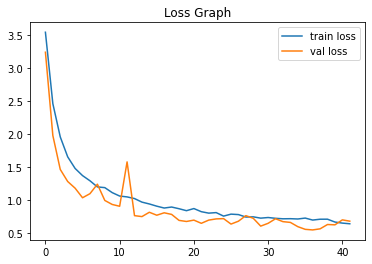

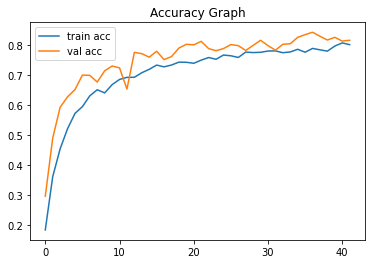

In [35]:
plot_graph(history)

This function is used to store true values and find the predictions of resnet and vgg19

In [38]:
true_value = []
resnet_pred = []
vgg19_pred = []
    
for folder in os.listdir(test_folder):

    test_img_id = os.listdir(os.path.join(test_folder,folder))
    for img_id in test_img_id[:int(len(test_img_id))]:

        path = os.path.join(test_folder,folder,img_id)
        true_value.append(test_generator.class_indices[folder])
        img = cv2.resize(cv2.imread(path),(224,224))
        img_normalised = img/255

        img_prediction_vgg = np.argmax(model.predict(np.array([img_normalised])))
        vgg19_pred.append(img_prediction_vgg)
        
        img_prediction_res = np.argmax(resnet_model.predict(np.array([img_normalised])))
        resnet_pred.append(img_prediction_res)
    

# Confusion Matrix and Classification Report

**VGG19 Report**

Modal Accuracy 0.5913978494623656


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



                           precision    recall  f1-score   support

                   Acacia       0.46      0.68      0.55        25
  Adenanthera microsperma       0.43      0.80      0.56        20
          Adenium species       0.92      1.00      0.96        36
   Anacardium occidentale       0.35      0.50      0.41        60
          Annona squamosa       0.89      0.96      0.93        26
       Artocarpus altilis       0.60      0.96      0.74        26
 Artocarpus heterophyllus       0.76      0.80      0.78        35
  Barringtonia acutangula       1.00      0.24      0.39        25
          Cananga odorata       0.83      0.20      0.32        25
            Carica papaya       0.83      0.73      0.78        52
  Casuarina equisetifolia       0.22      0.08      0.12        24
                   Cedrus       1.00      0.39      0.56        23
    Chrysophyllum cainino       0.00      0.00      0.00        28
     Citrus aurantiifolia       0.89      0.93      0.91     

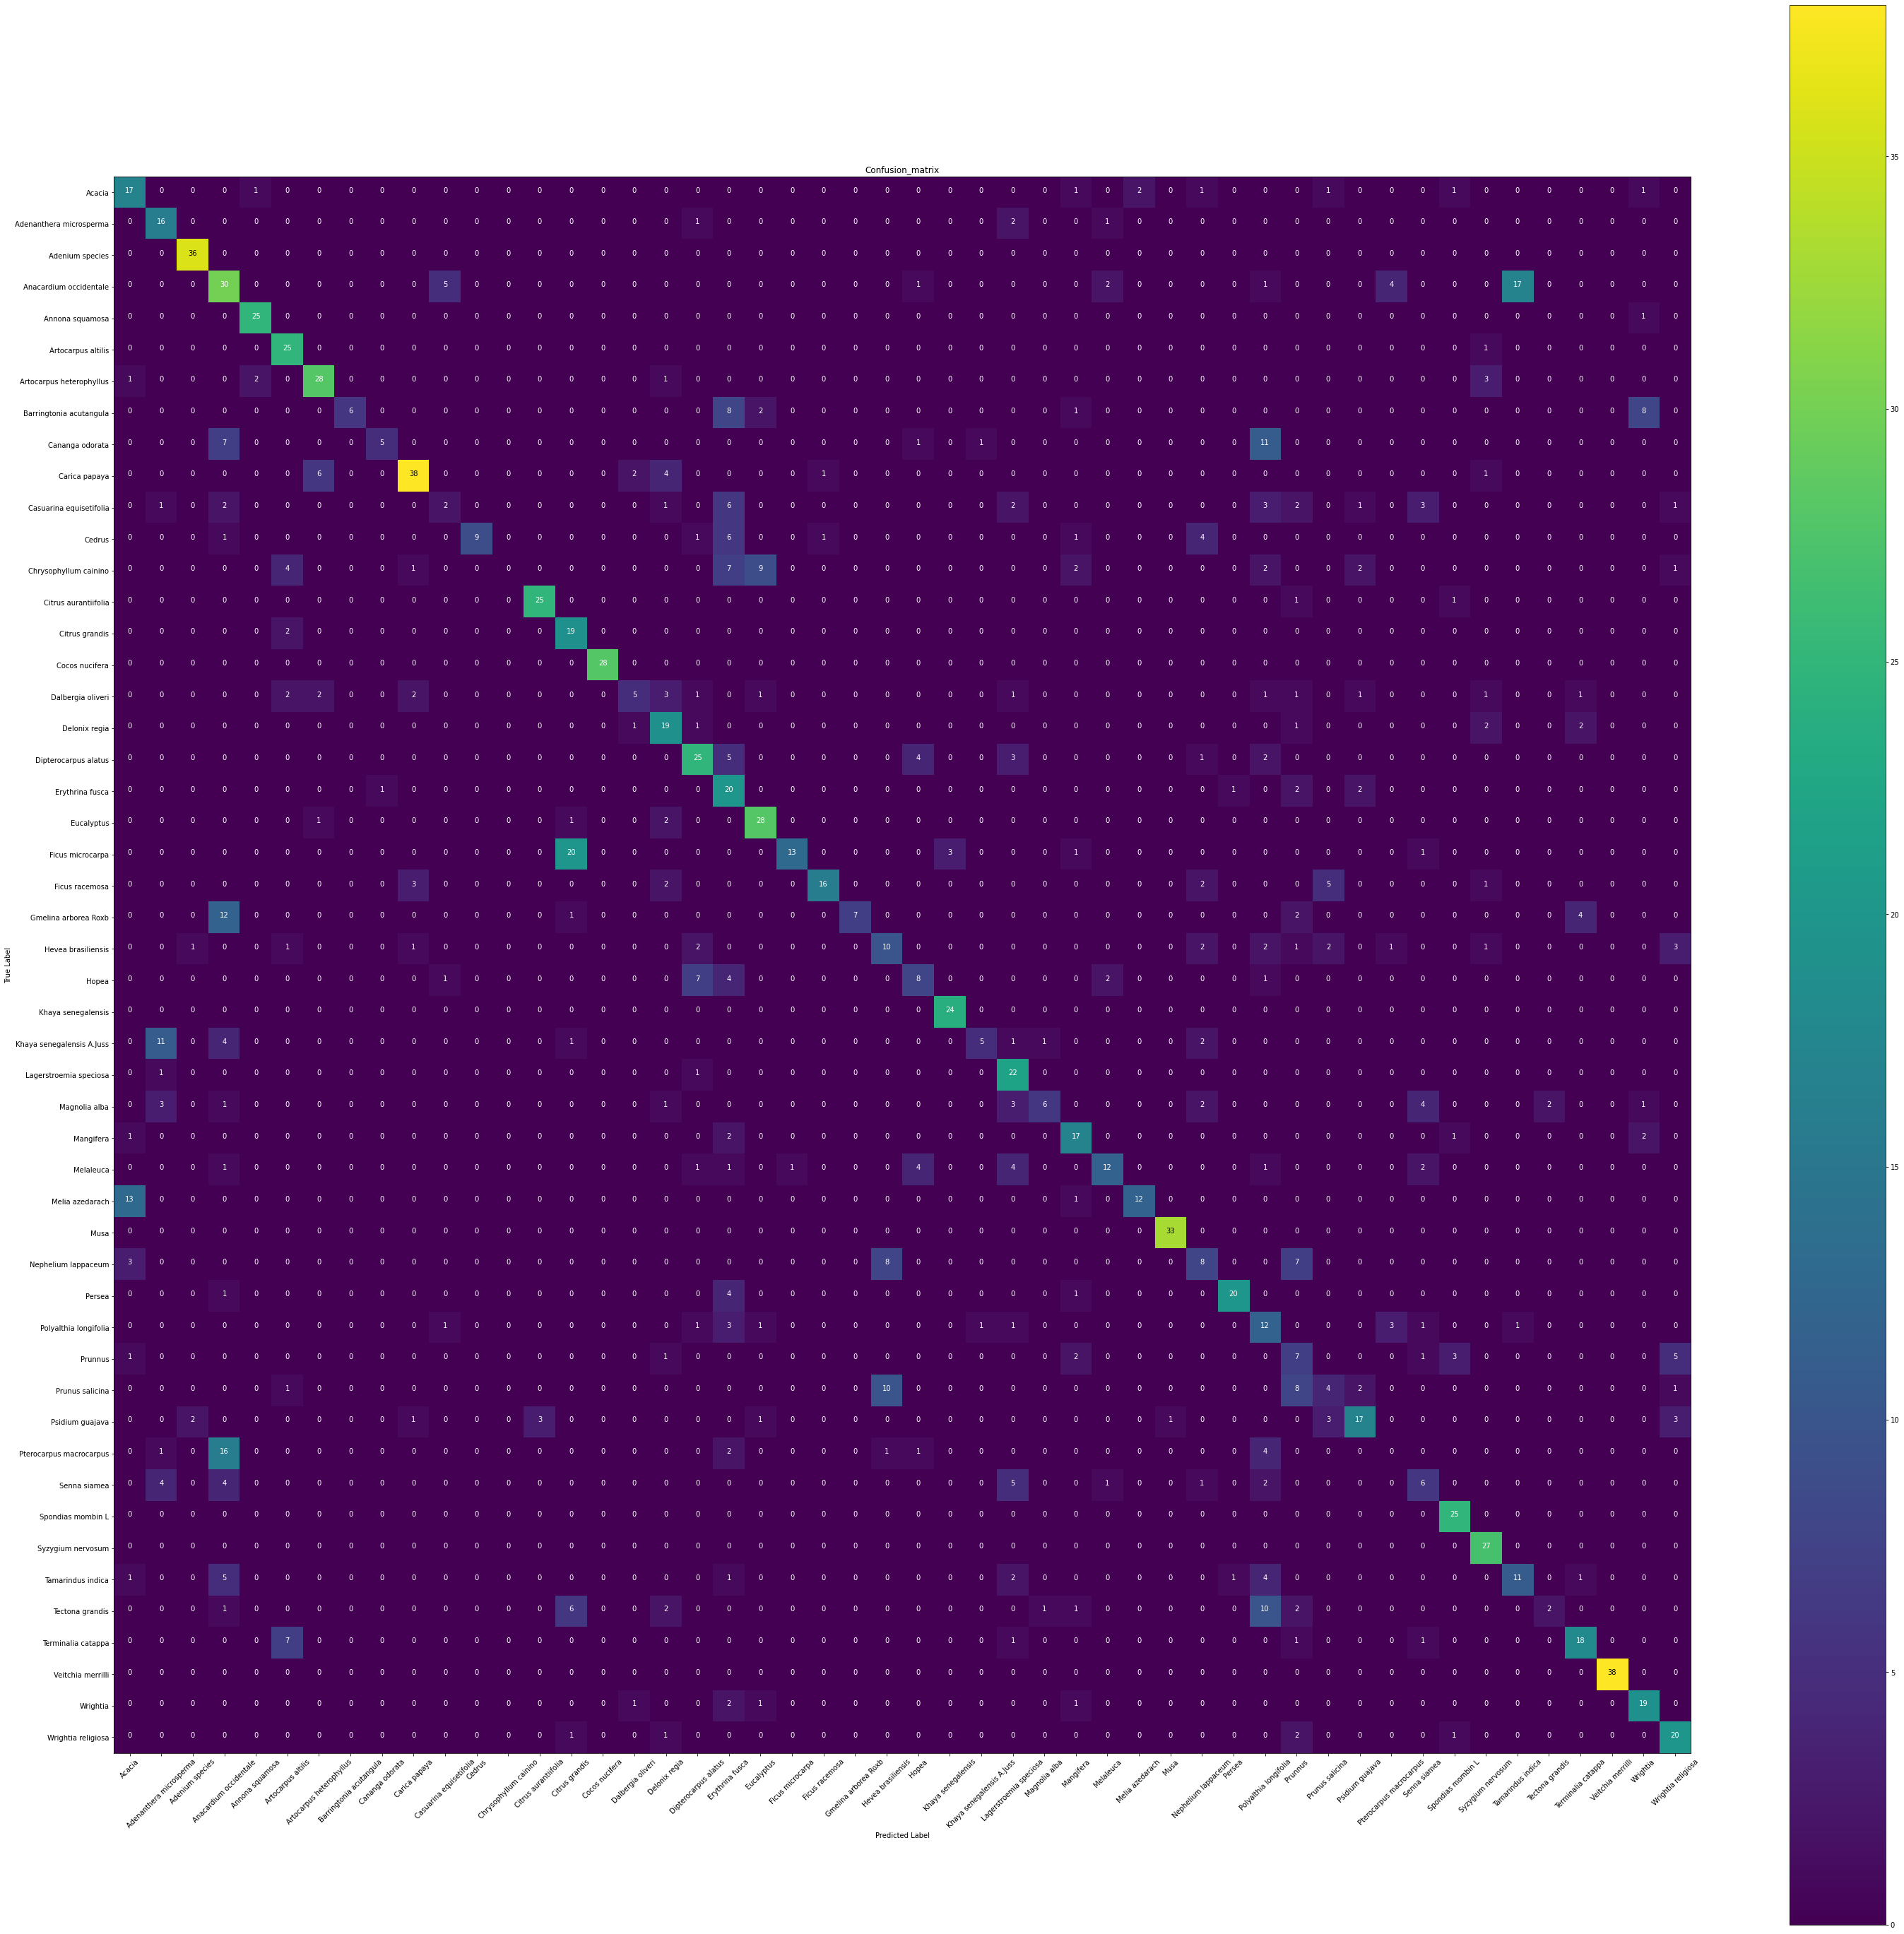

In [58]:
conf_matrix(true_value,vgg19_pred)

**ResNet Report**

Modal Accuracy 0.7051971326164874


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



                           precision    recall  f1-score   support

                   Acacia       1.00      0.90      0.95        20
  Adenanthera microsperma       0.69      0.56      0.62        16
          Adenium species       0.71      0.93      0.81        29
   Anacardium occidentale       0.73      0.79      0.76        48
          Annona squamosa       0.78      0.86      0.82        21
       Artocarpus altilis       1.00      1.00      1.00        21
 Artocarpus heterophyllus       0.77      0.82      0.79        28
  Barringtonia acutangula       1.00      0.80      0.89        20
          Cananga odorata       1.00      0.60      0.75        20
            Carica papaya       0.72      0.62      0.67        42
  Casuarina equisetifolia       1.00      0.42      0.59        19
                   Cedrus       0.81      0.89      0.85        19
    Chrysophyllum cainino       1.00      0.91      0.95        22
     Citrus aurantiifolia       0.96      1.00      0.98     

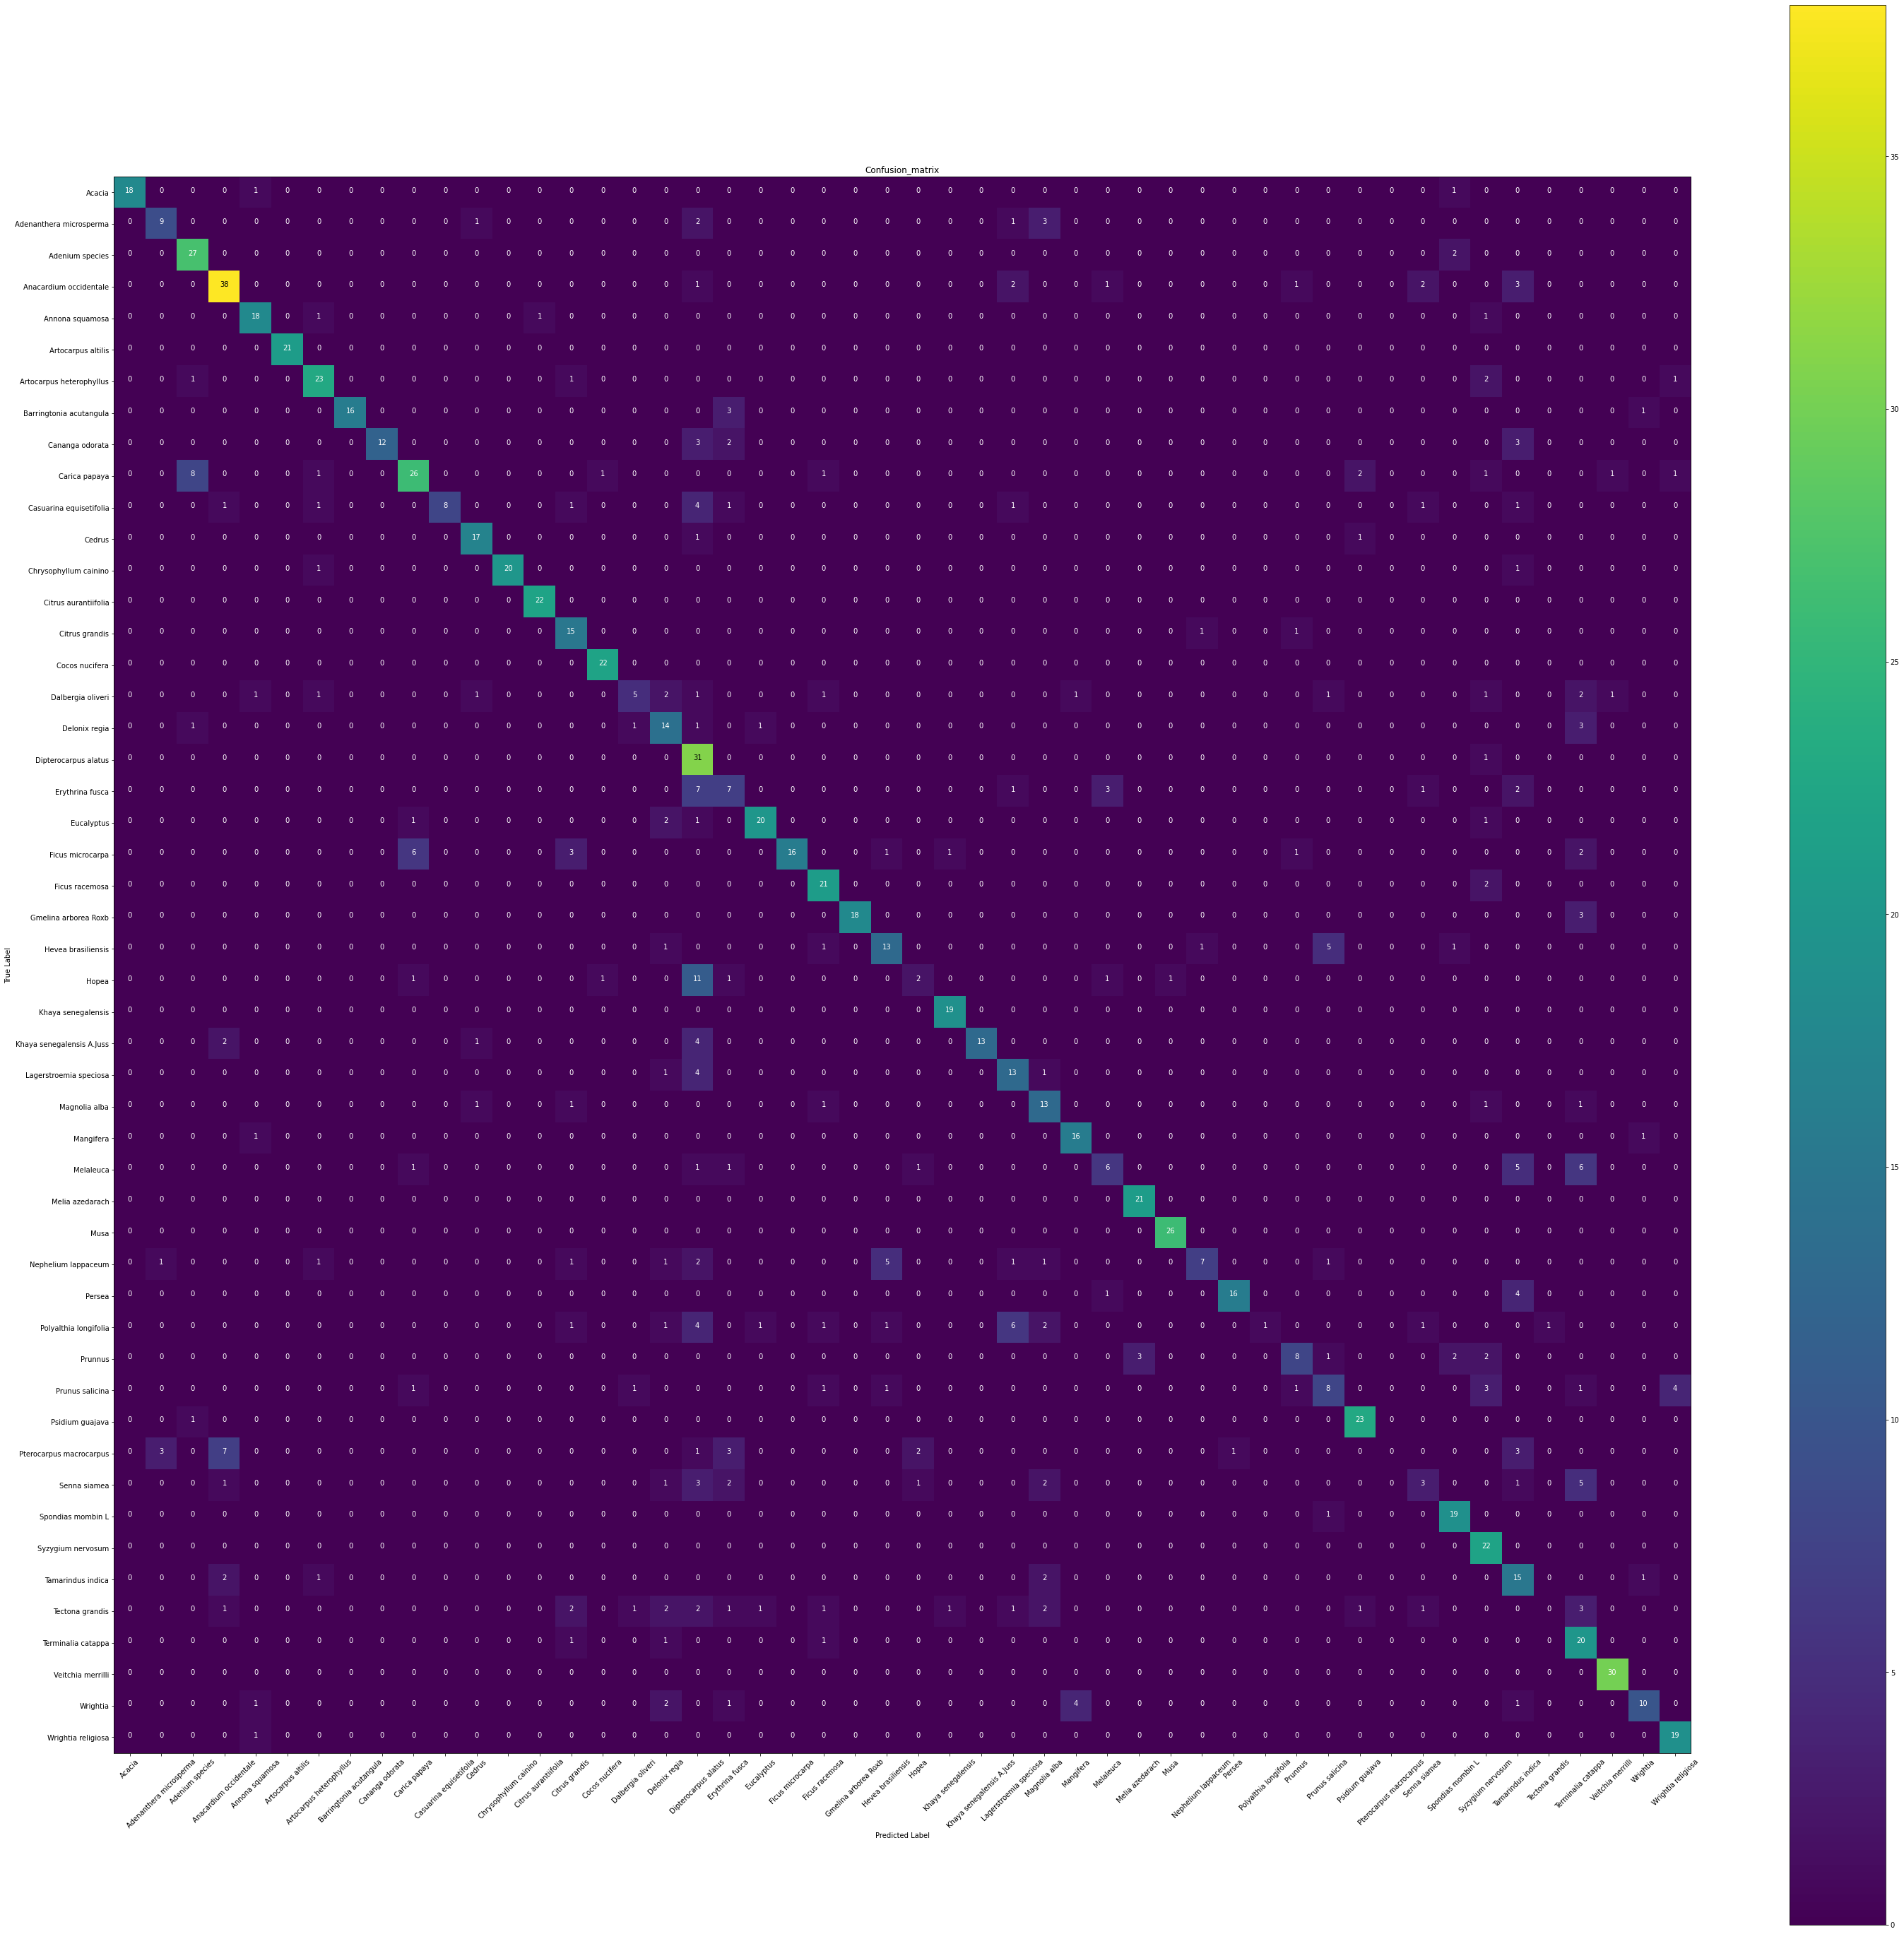

In [44]:
conf_matrix(true_value,resnet_pred)

# Summary

In [ ]:
ResNet101V2 model performs (Accuracy = 70%) much better than VGG19 model (Accuracy = 59%).